<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo42/blob/main/Reto2_aguas_superficiales.A01113135.A01793944.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#obtener la informacion
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv", encoding = "ISO-8859-1")
print(df['CALIDAD_TOX_FIS_FON_15'].isna().sum())
#como la columna CALIDAD_TOX_FIS_FON_15 no presenta valores la borramos
df = df.drop(['CALIDAD_TOX_FIS_FON_15'], axis=1)
#borramos TOX_FIS_FON_15_UT
print(df['TOX_FIS_FON_15_UT'].isna().sum())
df = df.drop(['TOX_FIS_FON_15_UT'], axis=1)
#borramos columna CALIDAD_TOX_D_48_FON
df = df.drop(['CALIDAD_TOX_D_48_FON'], axis=1)
#borramos la columna TOX_D_48_FON_UT
df = df.drop(['TOX_D_48_FON_UT'], axis=1)
df.shape
#nos quedamos con 51 features


4141
4141


(4141, 51)

In [11]:
# CALIDAD DBO Mapping 
df.CALIDAD_DBO.fillna(value=df.CALIDAD_DBO.mode()[0], inplace=True)
df['calidadDBOEncoded'] = df['CALIDAD_DBO'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)
 



In [12]:
#calidad DQO mapping
df.CALIDAD_DQO.fillna(value=df.CALIDAD_DQO.mode()[0], inplace=True) 
df['calidadDQOEncoded'] = df['CALIDAD_DQO'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)

In [13]:
#calidad SST mapping
df.CALIDAD_SST.fillna(value=df.CALIDAD_SST.mode()[0], inplace=True) 
df['calidadSSTEncoded'] = df['CALIDAD_SST'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)

In [14]:
#CALIDAD_COLI_FEC mapping
df.CALIDAD_COLI_FEC.fillna(value=df.CALIDAD_COLI_FEC.mode()[0], inplace=True) 
df['calidadCOLI_FECEncoded'] = df['CALIDAD_COLI_FEC'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)
                                        

In [15]:
#CALIDAD_E_COLI mapping
df.CALIDAD_E_COLI.fillna(value=df.CALIDAD_E_COLI.mode()[0], inplace=True) 
df['calidadE_COLIEncoded'] = df['CALIDAD_E_COLI'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)

In [16]:
#CALIDAD_ENTEROC mapping
df.CALIDAD_ENTEROC.fillna(value=df.CALIDAD_ENTEROC.mode()[0], inplace=True)
df['calidadENTEROCEncoded'] = df['CALIDAD_ENTEROC'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)

In [17]:
#CALIDAD_TOX_D_48 mapping
df.CALIDAD_TOX_D_48.fillna(value=df.CALIDAD_TOX_D_48.mode()[0], inplace=True)
df['calidadTOXDEncoded'] = df['CALIDAD_TOX_D_48'].map( {'No Toxico': 1, 
                                        'Toxicidad baja': 2,
                                        'Toxicidad moderada': 3, 
                                        'Toxicidad alta': 4, 
                                        '':0} ).astype(int)


In [18]:
#semaforo mapping
df.SEMAFORO.fillna(value=df.SEMAFORO.mode()[0], inplace=True)
df['semaforoEncoded'] = df['SEMAFORO'].map( {'Verde': 1, 
                                        'Amarillo': 2,
                                        'Rojo': 3,  
                                        '':0} ).astype(int)

In [39]:
#borramos 648 rows porque son filas que no tienen valor
df.dropna(subset=['LONGITUD'], inplace = True)
df.describe().round(2)



,LONGITUD,LATITUD,PERIODO,calidadDBOEncoded,calidadDQOEncoded,calidadSSTEncoded,calidadCOLI_FECEncoded,calidadE_COLIEncoded,calidadENTEROCEncoded,calidadTOXDEncoded,semaforoEncoded
count,3493.00,3493.00,3493.0,3493.00,3493.00,3493.00,3493.00,3493.00,3493.00,3493.00,3493.00
mean,-100.36,21.05,2020.0,1.72,3.12,1.84,3.99,3.47,1.17,1.04,1.95
std,6.12,3.89,0.0,1.07,1.19,1.11,1.33,1.81,0.77,0.28,0.82
min,-117.12,14.53,2020.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,-103.88,18.40,2020.0,1.00,2.00,1.00,3.00,1.00,1.00,1.00,1.00
50%,-99.80,20.15,2020.0,1.00,4.00,1.00,5.00,5.00,1.00,1.00,2.00
75%,-96.86,22.83,2020.0,3.00,4.00,2.00,5.00,5.00,1.00,1.00,3.00
max,-86.73,32.71,2020.0,5.00,5.00,5.00,5.00,5.00,5.00,4.00,3.00


**variable DBO**: tiene un valor maximo de 5 (agua fuertemente contaminada) y un valor minimo de 1 (agua en excelente estado). Ademas en promedio se tiene un valor de 1.71  lo cual significa que la mayoria de los municipios tienen agua en buen estado. La mediana de esta variable es de 1.

**variable DQO**: Tiene un valor maximo de 5 y un valor minimo de 1. En promedio esta variable muestra un 3.11 lo que significa que la calidad del agua es aceptable. La mediana de esta variable es de 4.

**variable SST**: Tiene un valor maximo de 5 mientras que el valor minimo equivale a 1. El promedio es de 1.84 por lo que se puede decir que la calidad del agua es buena. La mediana de esta variable es de 1.

**variable COLI_FEC**: Tiene un valor maximo de 5 y un valor minimo de 1. En promedio esta variable present un valor de 3.98 por lo que podemos afirmar que el agua no present un estado aceptable. La mediana de esta variable es de 5.

**variable E_coli**: Tiene un valor maximo de 5 y un valor minimo de 1. En promedio la calidad del agua es de 3.47(agua en estado aceptable). La mediana de esta variable es de 5.

**variable ENTOREC**: Tine un valor maximo de 5 y el valor minimo es 1. En promedio para esta variable la calidad del agua es de 1.17, por lo que podemos decir que tiene un estado excelente. La mediana de esta variable es de 5.





In [20]:
df.corr().round(2)

,LONGITUD,LATITUD,PERIODO,calidadDBOEncoded,calidadDQOEncoded,calidadSSTEncoded,calidadCOLI_FECEncoded,calidadE_COLIEncoded,calidadENTEROCEncoded,calidadTOXDEncoded,semaforoEncoded
LONGITUD,1.00,-0.71,NaN,0.03,0.03,-0.01,0.00,0.06,0.01,0.01,-0.02
LATITUD,-0.71,1.00,NaN,-0.06,-0.08,-0.13,-0.06,-0.14,-0.10,-0.01,-0.08
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calidadDBOEncoded,0.03,-0.06,NaN,1.00,0.38,0.32,-0.04,0.02,-0.15,0.29,0.56
calidadDQOEncoded,0.03,-0.08,NaN,0.38,1.00,0.22,0.29,0.41,0.17,0.17,0.31
calidadSSTEncoded,-0.01,-0.13,NaN,0.32,0.22,1.00,0.26,0.27,-0.04,0.12,0.36
calidadCOLI_FECEncoded,0.00,-0.06,NaN,-0.04,0.29,0.26,1.00,0.79,0.17,0.03,0.08
calidadE_COLIEncoded,0.06,-0.14,NaN,0.02,0.41,0.27,0.79,1.00,0.19,0.07,0.06
calidadENTEROCEncoded,0.01,-0.10,NaN,-0.15,0.17,-0.04,0.17,0.19,1.00,-0.03,0.25
calidadTOXDEncoded,0.01,-0.01,NaN,0.29,0.17,0.12,0.03,0.07,-0.03,1.00,0.17


Se puede ver una alta correlacion (0.79) entre la variable **calidadE_COLIEncoded** y **calidadCOLI_FECEncoded**. Podriamos reducir la dimensionalidad de las variables que usaremos al momento de aplicar k-means. 

([<matplotlib.axis.XTick at 0x7f105c394910>,
 [Text(0, 0, 'DBO'),
  Text(0, 0, 'DQO'),
  Text(0, 0, 'SST'),
  Text(0, 0, 'COLI_FEC'),
  Text(0, 0, 'E_COLI')])

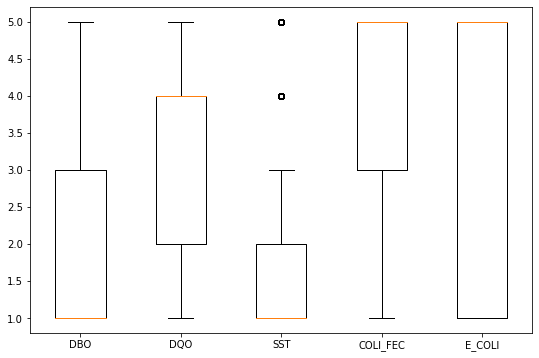

In [21]:
import matplotlib.pyplot as plt
one = df['calidadDBOEncoded']
two = df['calidadDQOEncoded']
three = df['calidadSSTEncoded']
four = df['calidadCOLI_FECEncoded']
five = df['calidadE_COLIEncoded']

to_plot=[one, two, three, four, five]
fig=plt.figure(1,figsize=(9,6))
ax=fig.add_subplot()
bp=ax.boxplot(to_plot)
plt.xticks([1, 2, 3, 4, 5], ['DBO', 'DQO', 'SST', 'COLI_FEC', 'E_COLI'])
# fig.savefig('boxplot.png',bbox_inches='tight')

En el grafico de BOXPLOT se puede ver que para **SST** existen **OUTLIERS** con valores que muestran el valor del agua contaminada y fuertemente contaminada. 

Para el caso de **COLI_FEC** el 50% de los datos tienen agua de baja calidad.

Para la variable **DQO**, el 25% de los datos tiene tiene agua de buena calidad, mientras que el otro 25% es agua contaminada.

Para **DBO** el 25% del agua va de calidad aceptable a fuertemente contamidanada. 

In [22]:
#import geopandas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 784 kB/s 
     |████████████████████████████████| 1.0 MB 32.3 MB/s 
     |████████████████████████████████| 1.7 MB 34.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 35.5 MB/s 
     |████████████████████████████████| 6.3 MB 34.1 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=2152d480dc8a4437bf4ad6c472ec84048e0fa37adf0fe8f61104132f27ee2778
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=35f579a0c219136da18601703f997591f4fb299f34ef7888266a67e97d19bc2a
  Stored in directory: /root/.

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

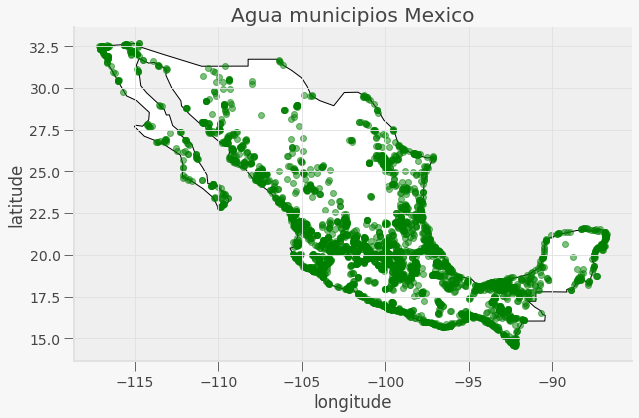

In [24]:
fig, gax = plt.subplots(figsize=(10,10))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='green', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Agua municipios Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

En el grafico de arriba se muestra todos los datos que se encuentran en diferentes regiones de mexico, para lograr esto usamos la libreria geopandas. 

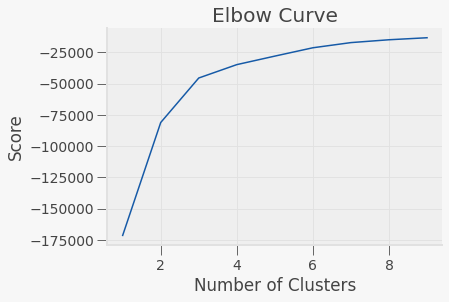

In [25]:
#primero determinamos un numero optimo de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
#aplicamos el algoritmo de kmeans a las variables de latitud , longitud y la propiedad quimica DBO. 
X = np.array(gdf[["LATITUD","LONGITUD", "calidadDBOEncoded"]])
x_train, x_test = train_test_split(X, test_size=0.10, random_state=1)
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x_train).score(x_train) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Basados en el principio del 'Codo' se puede ver que un buen numero de clusters es 4 ya que a partir de ese valor la grafica empieza a suavizarse. 

# New Section

In [26]:
#APLICAMOS el algoritmo de k-means
kmeans = KMeans(n_clusters=4).fit(x_train)
centroids = kmeans.cluster_centers_
print("los centroides muestran la latitud , longitud y la calidad del agua DQO")
print(centroids)

colors=['red','green','blue','brown']
labels = kmeans.predict(x_train)
asignar=[]
for row in labels:
    asignar.append(colors[row])

los centroides muestran la latitud , longitud y la calidad del agua DQO
[[  19.47423338  -98.9218645     1.96086262]
 [  28.46860627 -111.71185625    1.3933162 ]
 [  17.7824339   -92.15861558    1.45468998]
 [  22.45427289 -103.4708084     1.69644903]]


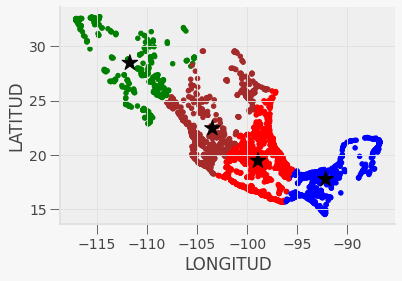

In [27]:
data = {'LATITUD':  centroids[:][:, 0],
        'LONGITUD': centroids[:][:, 1]}
dataFrame  = pd.DataFrame(data)
latlong=dataFrame[["LATITUD","LONGITUD"]]
f = x_train[:][:, 0]
f1 = x_train[:][:, 1]
data1 = {'LATITUD':  f,
        'LONGITUD': f1}
data1Frame = pd.DataFrame(data1)
l = data1Frame.plot.scatter( "LONGITUD","LATITUD", c=asignar)
latlong.plot.scatter("LONGITUD","LATITUD", c=['black', 'black', 'black', 'black'], ax=l, s= 270, marker= '*')

En el grafico se puede apreciar cuatro grupos claramente diferenciados a lo largo del territorio mexicano. El grupo azul tiene un valor de semaforo igual a 1.61, el grupo verde tiene un valor para el semaforo de 2.055. El grupo cafe tiene un valor de semaforo igual a 2.198 y finalmente el grupo rojo tiene un valor semaforo igual a 1.55.

Aplicando kmeans encontramos cuadro lugares importantes los cuales son: 

1. Texcoco Municipality, State of Mexico, Mexico (color rojo)

2. Macuspana Municipality, Tabasco, Mexico (color azul)

3. Monte Escobedo, Zacatecas, Mexico (color cafe)

4. El Cardonal, Sonora, Mexico (color verde)

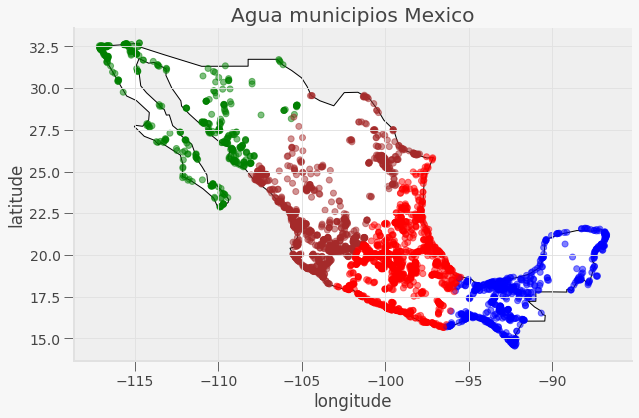

(3493, 60)

In [28]:
#dibujar los grupos en el mapa
data1Frame["Coordinates"] = list(zip(data1Frame.LONGITUD, data1Frame.LATITUD))
data1Frame["Coordinates"] = data1Frame["Coordinates"].apply(Point)
gdf1 = gpd.GeoDataFrame(data1Frame, geometry="Coordinates") 
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
gdf1.plot(ax=gax, color=asignar, alpha = 0.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Agua municipios Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()
gdf.shape

En este grafico se puede apreciar de mejor forma los 4 grupos que surgen al aplicar kmeans al grupo de datos de entrenamiento.

**PREDICCION**


In [29]:
new_labels = kmeans.predict(x_test)
newArr = new_labels[new_labels < 2]

print("grupo al que pertenece x_test pos 3 :::" , new_labels[3])
print("grupo al que pertenece x_test pos 5 :::" , new_labels[5])
print("grupo al que pertenece x_test pos 12 :::" , new_labels[12])
print("grupo al que pertenece x_test pos 65 :::" , new_labels[65])
print("grupo al que pertenece x_test pos 76 :::" , new_labels[76])
print(x_test[3], ' semaforo = rojo')#rojo
print(x_test[5], ' semaforo = rojo')#Rojo
print(x_test[12], ' semaforo = rojo')#Rojo
print(x_test[65], ' semaforo = verde')#Verde
print(x_test[76], ' semaforo = amarillo')#Amarillo


grupo al que pertenece x_test pos 3 ::: 0
grupo al que pertenece x_test pos 5 ::: 0
grupo al que pertenece x_test pos 12 ::: 0
grupo al que pertenece x_test pos 65 ::: 0
grupo al que pertenece x_test pos 76 ::: 0
[ 20.64148 -99.56632   2.     ]  semaforo = rojo
[ 25.65157 -98.03159   2.     ]  semaforo = rojo
[ 19.22803 -96.20357   3.     ]  semaforo = rojo
[ 16.85351 -99.86224   1.     ]  semaforo = verde
[ 21.39799 -99.58041   1.     ]  semaforo = amarillo


Para poder saber si podemos determinar la calidad del agua en base al centroide se ejecuto kmeans.predict con los datos de prueba x_test. El resultado para el grupo 1 (color verde en la grafica) muestra diferentes valores para la variable semaforo. Por ejemplo para el dato de test en la posicion 3 , el valor del semaforo es rojo mientras que el dato de test en la posicion 76 tiene como semaforo el color amarillo. Podemos concluir que con el algoritmo de kmeans se hizo un agrupamiento correcto de las latitudes y longitudes, **pero el tema del semaforo falla porque no podemos determinar en base a la region la calidad del agua**



In [30]:
from sklearn import tree
from sklearn.model_selection import KFold
X1 = df[["LATITUD","LONGITUD", "calidadDBOEncoded", "calidadDQOEncoded", "calidadSSTEncoded", 
         "calidadCOLI_FECEncoded", "calidadE_COLIEncoded", "calidadENTEROCEncoded", "calidadTOXDEncoded", 
         "semaforoEncoded"]]

cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(X))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight='balanced')
    for train_fold, valid_fold in cv.split(X):
        f_train = X1.loc[train_fold] 
        f_valid = X1.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['semaforoEncoded'], axis=1), 
                               y = f_train["semaforoEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['semaforoEncoded'], axis=1), 
                                y = f_valid["semaforoEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dfDepth = pd.DataFrame({"Profundidad": depth_range, "Precision": accuracies})
dfDepth = dfDepth[["Profundidad", "Precision"]]
print(dfDepth.to_string(index=False))

 Profundidad  Precision
           1   0.625199
           2   0.871462
           3   0.916684
           4   0.941596
           5   0.955343
           6   0.956489
           7   0.948466
           8   0.951334
           9   0.949614
          10   0.947321
          11   0.945316
          12   0.944456
          13   0.944743
          14   0.943885
          15   0.943312
          16   0.943026
          17   0.943312
          18   0.943312
          19   0.943026
          20   0.943026
          21   0.943599
          22   0.943026
          23   0.943026
          24   0.943312
          25   0.943312
          26   0.943026
          27   0.943599
          28   0.943599
          29   0.943312
          30   0.943026
          31   0.943599
          32   0.943312
          33   0.943026
          34   0.943312
          35   0.943312
          36   0.943312
          37   0.943599
          38   0.943312
          39   0.943312
          40   0.943312
          41   0

**PROFUNDIDAD PARA EL ARBOL**

Podemos ver que con una profundidad de 5 el arbol obtiene buenos resultados.

In [31]:
X = df[["LATITUD","LONGITUD", "calidadDBOEncoded", "calidadDQOEncoded", "calidadSSTEncoded", "calidadCOLI_FECEncoded", "calidadE_COLIEncoded", "calidadENTEROCEncoded", "calidadTOXDEncoded"]]
Y = df[["semaforoEncoded"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
 
 
# Crear Arbol de decision con profundidad = 5
decisionTree = tree.DecisionTreeClassifier(criterion='gini',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 5,
                                            class_weight="balanced")
# ejecutamos el arbol
decisionTree.fit(x_train, y_train)
print("::::::::FEATURE IMPORTANCE DECISION TREE::::::::")
for score, name in zip(decisionTree.feature_importances_, X.columns):
    print(round(score, 2), name)

::::::::FEATURE IMPORTANCE DECISION TREE::::::::
0.0 LATITUD
0.01 LONGITUD
0.2 calidadDBOEncoded
0.35 calidadDQOEncoded
0.04 calidadSSTEncoded
0.31 calidadCOLI_FECEncoded
0.01 calidadE_COLIEncoded
0.08 calidadENTEROCEncoded
0.0 calidadTOXDEncoded


In [32]:
from sklearn.ensemble import RandomForestClassifier
rndForest= RandomForestClassifier(n_estimators=50, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)

rndForest.fit(x_train, y_train)
print("::::::::FEATURE IMPORTANCE DECISION TREE::::::::")
for score, name in zip(rndForest.feature_importances_, X.columns):
    print(round(score, 2), name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


::::::::FEATURE IMPORTANCE DECISION TREE::::::::
0.02 LATITUD
0.04 LONGITUD
0.19 calidadDBOEncoded
0.36 calidadDQOEncoded
0.05 calidadSSTEncoded
0.19 calidadCOLI_FECEncoded
0.07 calidadE_COLIEncoded
0.08 calidadENTEROCEncoded
0.0 calidadTOXDEncoded


FEATURE IMPORTANCE:

Tanto en decision tree como random forest las variables de mayor importancia son: **calidadDBOEncoded, calidadDQOEncoded, calidadSSTEncoded, calidadCOLI_FECEncoded, calidadE_COLIEncoded, calidadENTEROCEncoded**

In [37]:
xFinal = df[["calidadDBOEncoded", "calidadDQOEncoded", "calidadSSTEncoded", "calidadCOLI_FECEncoded", "calidadE_COLIEncoded", "calidadENTEROCEncoded"]]
yFinal = df[["semaforoEncoded"]]

x_trainFinal, x_testFinal, y_trainFinal, y_testFinal = train_test_split(xFinal, yFinal, test_size=0.20, random_state=1)

decisionTree = tree.DecisionTreeClassifier(criterion='gini',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 5,
                                            class_weight="balanced")

decisionTree.fit(x_trainFinal, y_trainFinal)
scoreDecisionTree = round(decisionTree.score(x_trainFinal, y_trainFinal) * 100, 2)
print("Decision Tree Porcentaje de precision con datos de entrenamiento: ", scoreDecisionTree)

rndForestFinal= RandomForestClassifier(n_estimators=100, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rndForestFinal.fit(x_trainFinal, y_trainFinal)
scoreRandomForest = round(rndForestFinal.score(x_trainFinal, y_trainFinal) * 100, 2)
print("Random Forest Porcentaje de precision con datos de entrenamiento: ", scoreRandomForest)

decisionTree.fit(x_testFinal, y_testFinal)
scoreDecisionTree = round(decisionTree.score(x_testFinal, y_testFinal) * 100, 2)
print("Decision Tree Porcentaje de precision con datos de test: ", scoreDecisionTree)

rndForestFinal= RandomForestClassifier(n_estimators=100, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rndForestFinal.fit(x_testFinal, y_testFinal)
scoreRandomForest = round(rndForestFinal.score(x_testFinal, y_testFinal) * 100, 2)
print("Random Forest Porcentaje de precision con datos de test: ", scoreRandomForest)

#print("Prediccion: " + str(y_pred))
#y_proba = decisionTree.predict_proba(x_test.drop(['top'], axis = 1))

Decision Tree Porcentaje de precision con datos de entrenamiento:  95.31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest Porcentaje de precision con datos de entrenamiento:  95.56
Decision Tree Porcentaje de precision con datos de test:  96.71


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest Porcentaje de precision con datos de test:  97.0


Despues de aplicar ambos clasificadores a nuestros datos de entrenamiento, podemos ver que el porcentaje de precision para D**ecision Tree = 95.31 y Random Forest = 95.56**
**Por lo que se puede afirmar que el mejor modelo para representar nuestros datos es Random Forest** a pesar de que la diferencia es minima respecto a Decision Tree.

In [34]:
#print(x_testFinal.iloc[[211]])
y_pred = rndForestFinal.predict(x_testFinal.iloc[[211]])
print("valor predecido con random forest semaforoEncode: " , y_pred)
realValue = y_testFinal.iloc[[211]]
print("valor real: ", realValue.to_string(index=False))


valor predecido con random forest semaforoEncode:  [1]
valor real:   semaforoEncoded
               1


**classification report**
Ahora creamos el reporte de clasification

In [35]:
from sklearn.metrics import classification_report

yPredicted = rndForestFinal.predict(x_testFinal)
print(classification_report(y_testFinal, yPredicted, labels=[1, 2, 3]))


              precision    recall  f1-score   support

           1       0.92      1.00      0.96       246
           2       1.00      0.91      0.95       201
           3       1.00      0.99      0.99       252

    accuracy                           0.97       699
   macro avg       0.97      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



yPredicted es la variable que contiene valores predecidos para nuestros datos de prueba usando randonforest. Aplicando classification report a estos datos podemos ver que la precision es bastante alta para los 3 valores del semaforo.
Tanto para el color amarillo (2) y rojo (3) la precision es de un 100% esto significa que no se encontraron falsos positivos.  Para el color verde (1) la precision fue de 92% , es decir que de los 246 casos donde se predijo el color verde se encontraron falsos positivos.

**CONFUSION MATRIX **
Ahora calculamos la matriz de confusion


In [36]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_testFinal, yPredicted)

array([[246,   0,   0],
       [ 18, 183,   0],
       [  3,   0, 249]])

Analizando la matriz se encuentran resultados interesantes:
de 246 valores que realmente son verdes, se predijeron los 246 valores correctamente. El problema fue de que el clasificador predijo 18 + 3 valores verdes  pero en realidad eran amarillos y rojos respectivamente.
Ahora para el valor amarillo predijo correctamente 183 valores (18 valores errados), y para el color rojo predijo con exactitud 249 valores y 3 valores fueron errados. 
Analizando la precision del color verde podemos ver que el valor de 0.92 viene dado por  precicionVerde = 246/ (246 + 18 + 3)